# West vs. East resuspension rate difference classification

Based on tidal speeds from Jacqui-Lee

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime
import cmocean
import pickle
import scipy.io

%matplotlib inline

###### Parameters:

In [2]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

###### Load files:

In [3]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

cond2      = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

Load tidal speed array from Jacqui-Lee:

In [4]:
mat         = scipy.io.loadmat('/ocean/brogalla/GEOTRACES/data/mean_tide_speed.mat')
tidal_speed = mat['mean_speed']

ts_mesh     = nc.Dataset('/ocean/brogalla/GEOTRACES/data/hsquare.nc')
ts_lons     = np.array(ts_mesh.variables['nav_lon'])
ts_lats     = np.array(ts_mesh.variables['nav_lat'])

Load tidal forcing file:

In [5]:
tff = nc.Dataset('/ocean/brogalla/GEOTRACES/data/erosion_rate-20210310.nc')
erosion_rate = np.array(tff.variables['er_rate'])
log_erosion_rate = np.log10(erosion_rate)

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


##### Figures:

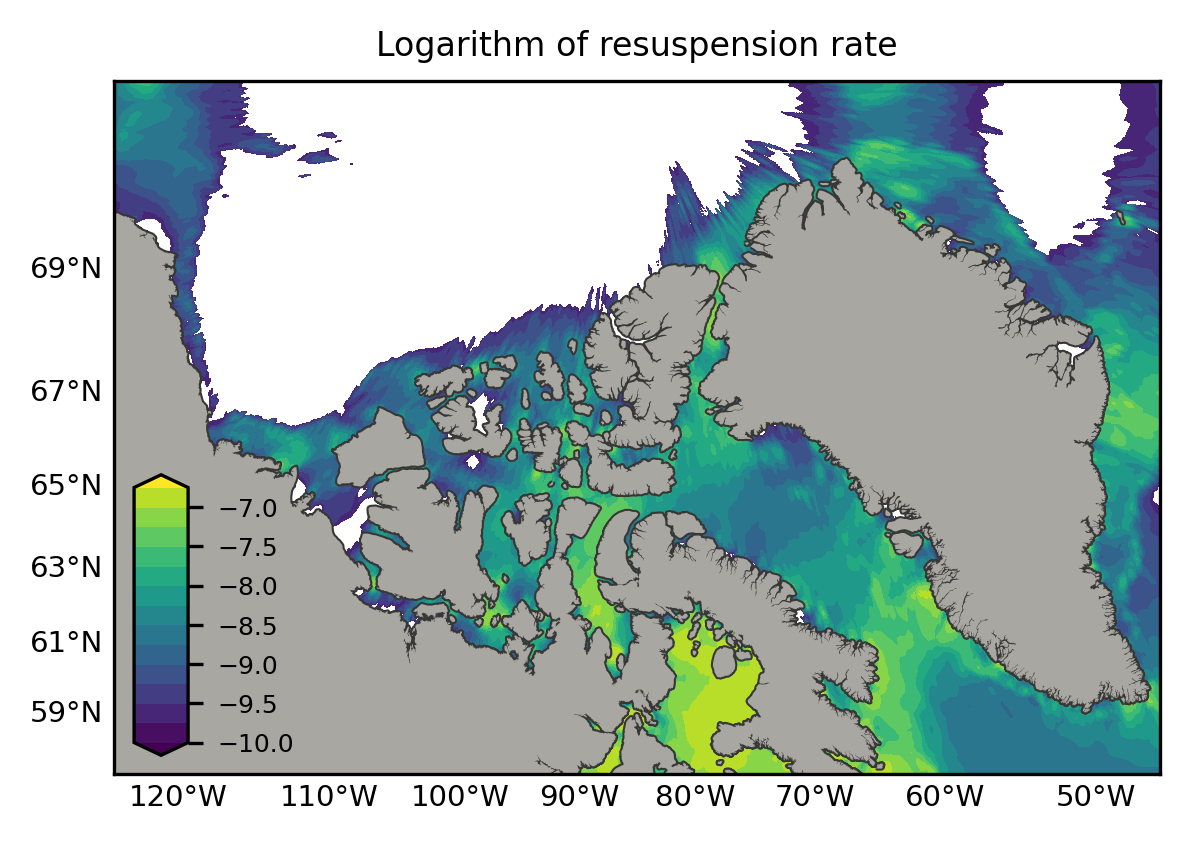

In [6]:
fig, ax1, proj1= pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 

# tidal stress:
CB = proj1.contourf(x_sub, y_sub, log_erosion_rate, vmin=-10, vmax=-6.5, \
                    levels=np.arange(-10,-6.5,0.25), extend='both')

cbaxes = fig.add_axes([0.14, 0.21, 0.04, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes, ticks=np.arange(-10,-6.5,0.5))
CBar.ax.tick_params(labelsize=6)

ax1.set_title('Logarithm of resuspension rate', fontsize=8)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S1-erosion-rate.png', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S1-erosion-rate.svg', bbox_inches='tight', dpi=300, \
            format='svg')

In [10]:
print('Units [g/m2/yr]')
print('Average erosion rate in domain: ', np.average(erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600)
print('Maximum erosion rate in domain: ', np.amax(erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600)
print('Minimum erosion rate in domain: ', np.amin(erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600)

Units [g/m2/yr]
Average erosion rate in domain:  137.18041071623088
Maximum erosion rate in domain:  4424.765338154094
Minimum erosion rate in domain:  0.0


### Solubility figure:

In [6]:
gamma   = 0.065
alpha_0 = 0.3e-6*9*0.8*0.055/gamma

tide           = np.linspace(0,1,100)
changing_solubility_resus_rate = alpha_0*gamma*(1-np.exp(-(tide)**2/gamma))*3600*24*365*1e3
constant_solubility_resus_rate = alpha_0*(tide**2)*3600*24*365*1e3

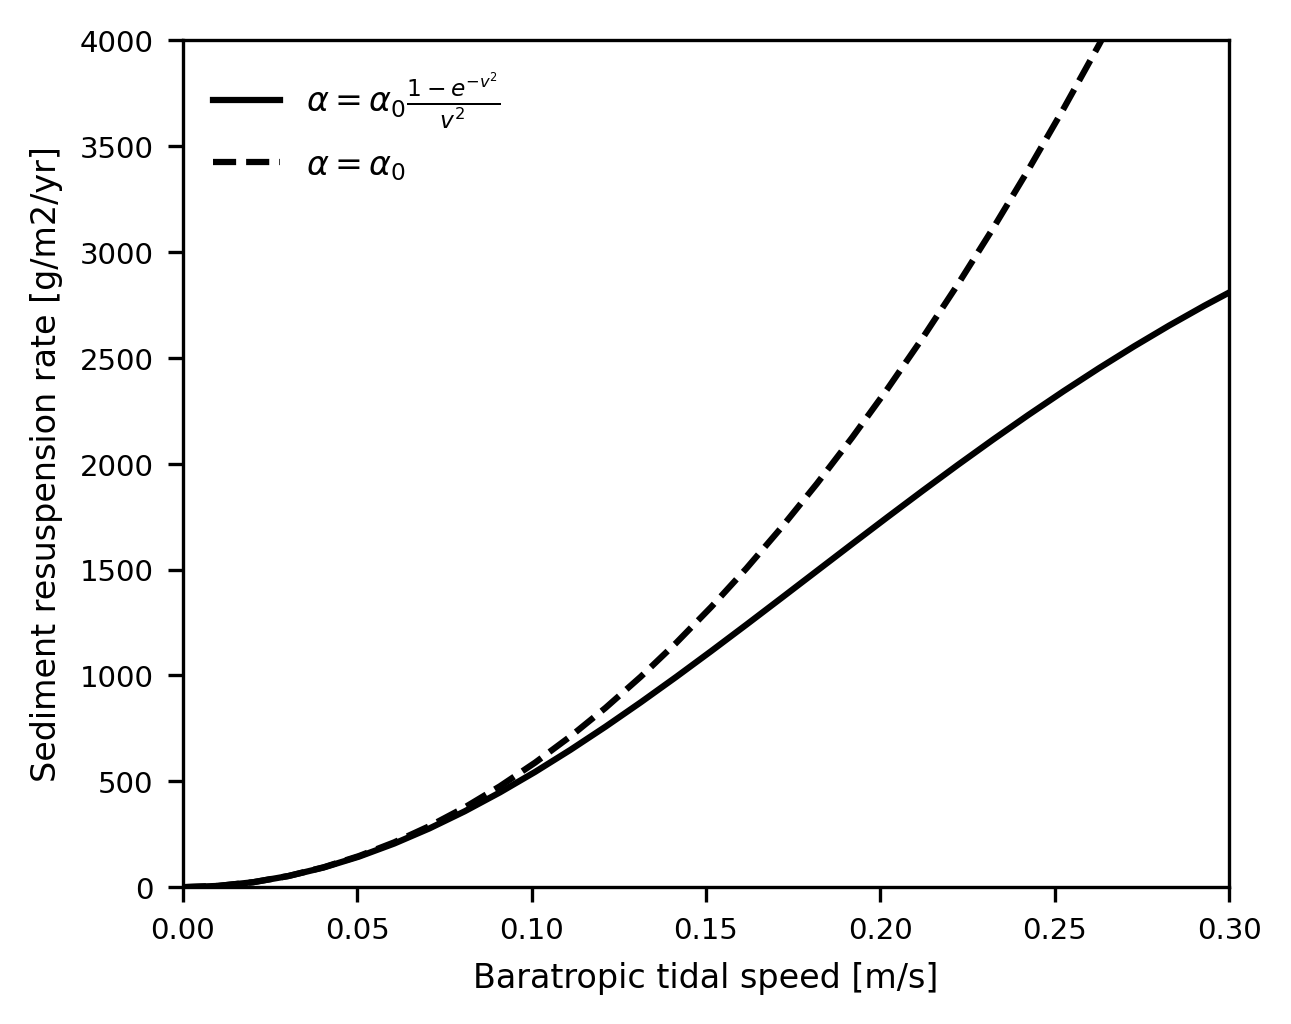

In [7]:
fig, ax = plt.subplots(1,1, figsize=(4.5, 3.74), dpi=300)

ax.plot(tide, changing_solubility_resus_rate, '-k', label=r'$\alpha = \alpha_0\frac{1-e^{-v^2}}{v^2}$')
ax.plot(tide, constant_solubility_resus_rate, '--k', label=r'$\alpha = \alpha_0$')
ax.set_xlim([0, 0.3])
ax.set_ylim([0,4e3])
ax.set_xlabel('Baratropic tidal speed [m/s]', fontsize=8)
ax.set_ylabel('Sediment resuspension rate [g/m2/yr]', fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=7)

ax.legend(fontsize=8, frameon=False)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S2-tail-off.png', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S2-tail-off.svg', bbox_inches='tight', dpi=300, format='svg')